15.6
2122.667397758015
[15.45, 15.72, 15.54, 15.55, 15.53, 15.64, 15.67, 15.67, 16.02, 16.17, 16.42, 16.84, 38.72, 39.15, 39.88, 41.76, 49.01, 80.62, 134.36, 206.62, 319.52, 527.29, 948.13, 1928.79, 4046.2, 8140.43, 16310.59, 32528.35, 64961.08, 125319.18]


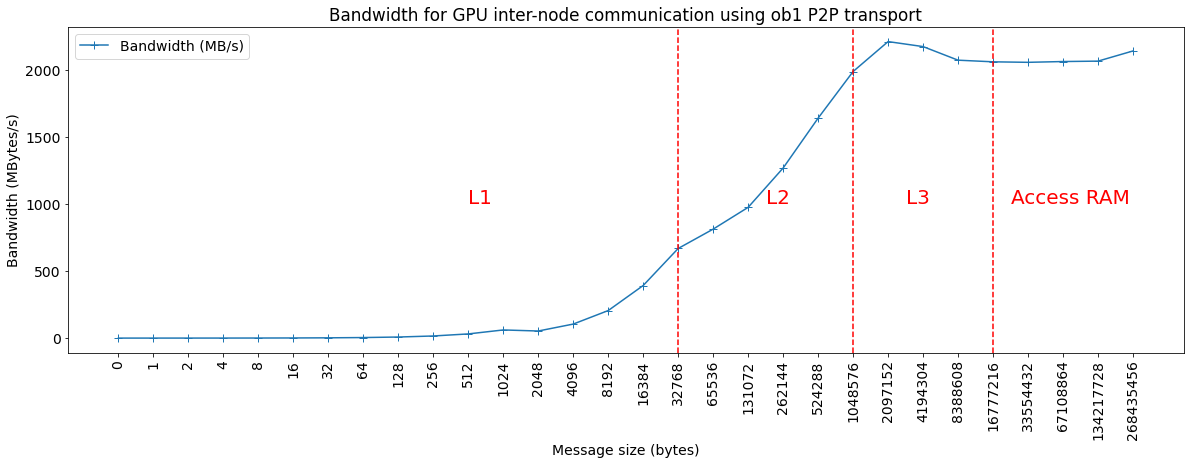

In [46]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x1 = []
x2 = []
bw = []
latency = []
repetitions = []
z1 = []

plt.figure(figsize=(20,6))
plt.rc('font', size=14) 

with open('node_ob1_openmpi_gpu.csv','r') as File:  
    Lines = csv.reader(File, delimiter = ',')
        
    for row in Lines:
        x1.append(row[0])
        x2.append(int(row[0]))
        repetitions.append(row[1])
        bw.append(float(row[3]))
        latency.append(float(row[2]))
        
valsum=0
for val in latency[0:8]:
    valsum+=val
lambda_sym = round((valsum/8),2)

def func(x, bandwith):
    return lambda_sym + x/bandwith
print(lambda_sym)
popt, pcov = curve_fit(func, x2[8:], latency[8:])
print(popt[0])
print(latency)
for data in x1:
    z1.append(round((lambda_sym+float(data)/popt[0]),2))

plt.plot(x1, bw, label = "Bandwidth (MB/s)",marker="+", markersize=8)
plt.xlabel('Message size (bytes)')
plt.xticks(rotation=90)
plt.ylabel('Bandwidth (MBytes/s)')
plt.text(10,1000,'L1',color='red',fontsize=20)
plt.text(18.5,1000,'L2',color='red',fontsize=20)
plt.text(22.5,1000,'L3',color='red',fontsize=20)
plt.text(25.5,1000,'Access RAM',color='red',fontsize=20)
plt.axvline(16, 0, 40,color ="red", linestyle='dashed')
plt.axvline(21, 0, 40,color ="red", linestyle='dashed')
plt.axvline(25, 0, 40,color ="red", linestyle='dashed')
plt.title('Bandwidth for GPU inter-node communication using ob1 P2P transport')
plt.legend()
#plt.show()
plt.savefig('node_ob1_bw_gpu.jpg', bbox_inches='tight')


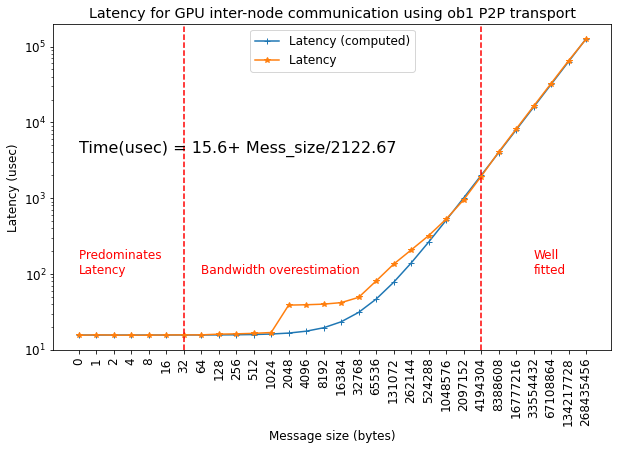

In [47]:
plt.figure(figsize=(10,6))
plt.rc('font', size=12) 
plt.plot(x1, z1, label = "Latency (computed)",marker="+", markersize=6)
plt.plot(x1, latency, label = "Latency ",marker="*", markersize=6)
plt.xlabel('Message size (bytes)')
plt.xticks(rotation=90)
plt.yscale("log")
plt.ylabel('Latency (usec)')
L_str = "Time(usec) = "+str(lambda_sym)+ "+ Mess_size/"+str(round(popt[0],2))
plt.text(0,4000,L_str,color='black',fontsize=16)
plt.text(0,100,'Predominates \nLatency',color='red',fontsize=12)
plt.text(7,100,'Bandwidth overestimation',color='red',fontsize=12)
plt.text(26,100,'Well\nfitted',color='red',fontsize=12)
plt.axvline(6, 0, 40,color ="red", linestyle='dashed')
plt.axvline(23, 0, 40,color ="red", linestyle='dashed')
plt.title('Latency for GPU inter-node communication using ob1 P2P transport')
plt.legend()
#plt.show()
plt.savefig('node_ob1_lat_gpu.jpg', bbox_inches='tight')

In [48]:
f = open("../node_ob1_comp_gpu.csv", "a")
f.write("#Command used: mpirun --mca pml ob1 --mca btl self,tcp --map-by node -np 2 -report-bindings ./IMB-MPI1 PingPong -msglog 28\n")
f.write("#Nodes involved: ct1pg-gnode001+ct1pg-gnode003\n")
L_reg= ["#lambda = ",str(lambda_sym)," usec, bandwith= ",str(round(popt[0],2)), " MB/s\n"]
f.writelines(L_reg)
f.write("#bytes #repetitions   t[usec]   Mbytes/sec   t[usec] computed  \n")
for index in range(len(x1)):
   List = [x1[index],",",str(repetitions[index]),",",str(latency[index]),",",str(bw[index]),",",str(z1[index]), "\n"]
   f.writelines(List)

f.close()

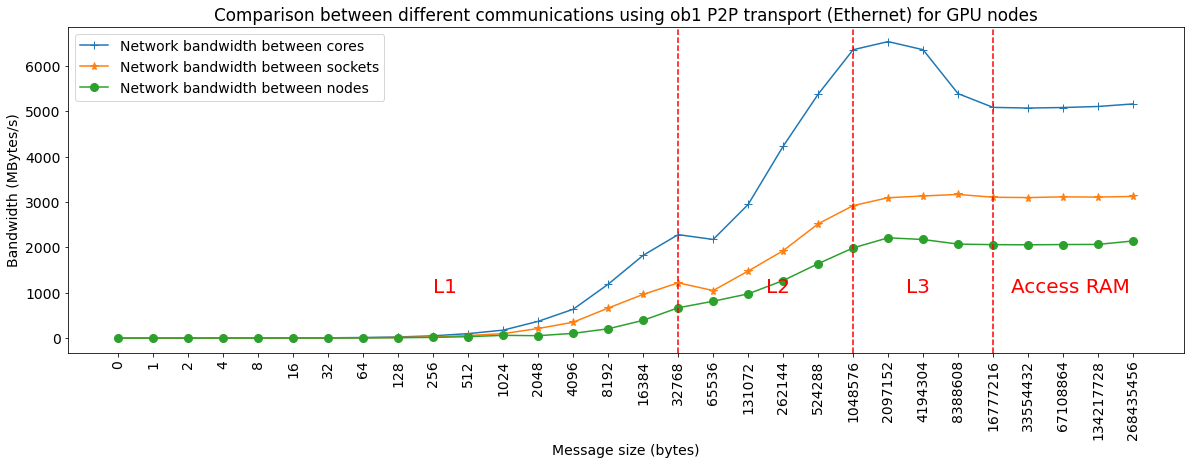

In [75]:
x_1 = []
y_1 = []
y_2 = []
y_3 =[]
plt.rc('font', size=14) 
plt.figure(figsize=(20,6))
with open('core_ob1_openmpi_gpu.csv','r') as File:  
    Lines = csv.reader(File, delimiter = ',')
        
    for row in Lines:
        x_1.append(row[0])
        y_1.append(float(row[3]))
        
with open('socket_ob1_openmpi_gpu.csv','r') as File:  
    Lines = csv.reader(File, delimiter = ',')
        
    for row in Lines:
        y_2.append(float(row[3]))

with open('node_ob1_openmpi_gpu.csv','r') as File:  
    Lines = csv.reader(File, delimiter = ',')
        
    for row in Lines:
        y_3.append(float(row[3]))


plt.plot(x_1, y_1, label = "Network bandwidth between cores",marker="+", markersize=8)
plt.plot(x_1, y_2, label = "Network bandwidth between sockets",marker="*", markersize=8)
plt.plot(x_1, y_3, label = "Network bandwidth between nodes",marker="o", markersize=8)
plt.xlabel('Message size (bytes)')
plt.xticks(rotation=90)
plt.ylabel('Bandwidth (MBytes/s)')
plt.text(9,1000,'L1',color='red',fontsize=20)
plt.text(18.5,1000,'L2',color='red',fontsize=20)
plt.text(22.5,1000,'L3',color='red',fontsize=20)
plt.text(25.5,1000,'Access RAM',color='red',fontsize=20)
plt.axvline(16, 0, 40, label='',color ="red", linestyle='dashed')
plt.axvline(21, 0, 40,color ="red", linestyle='dashed')
plt.axvline(25, 0, 40,color ="red", linestyle='dashed')
plt.title('Comparison between different communications using ob1 P2P transport (Ethernet) for GPU nodes')
plt.legend()
#plt.show()
plt.savefig('ob1_comp_gpu.jpg', bbox_inches='tight')